In [103]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy import signal, ndimage
from skimage import measure
import time
import pandas as pd

%matplotlib inline

In [104]:
image1 = cv2.imread('../../Klarity_Defect/Picture173.jpg',0) #0 for grayscale
print(image1.shape)

(304, 304)


In [95]:
raw_image = cv2.resize(image1, (480,480))
width, height = raw_image.shape

for i in range(380,420):
    for j in range(100, 380):
        raw_image[i][j] = raw_image[i][0]

In [96]:
ret,thresh1 = cv2.threshold(raw_image,100,1,cv2.THRESH_BINARY) #binary threshold
blur = cv2.GaussianBlur(raw_image,(3,3),0)
ret3,thresh3 = cv2.threshold(blur,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)  #Otsu's thresholding

In [97]:
th = cv2.adaptiveThreshold(raw_image,1,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

(<matplotlib.axes._subplots.AxesSubplot at 0x111357f0>,
 <matplotlib.image.AxesImage at 0x13b646a0>)

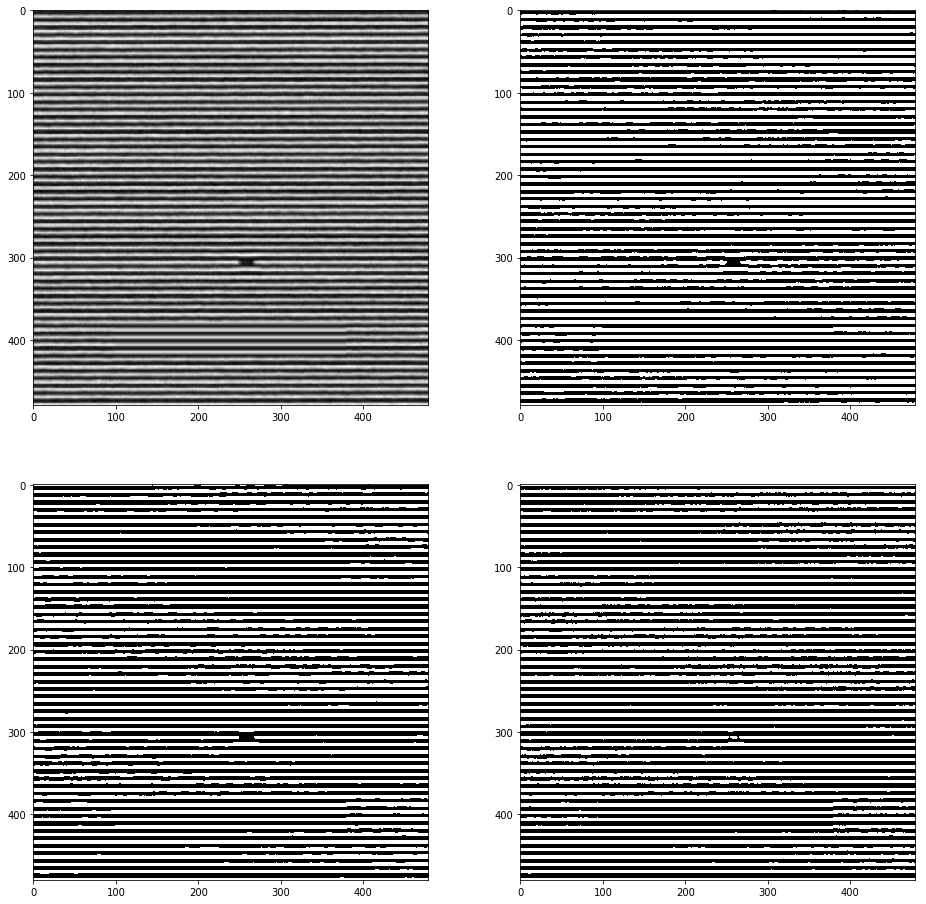

In [98]:
plt.subplots(2,2,figsize=(16,16))
plt.subplot(221), plt.imshow(raw_image, cmap='gray')
plt.subplot(222), plt.imshow(thresh1, cmap='gray')
plt.subplot(223), plt.imshow(thresh3, cmap='gray')
plt.subplot(224), plt.imshow(th, cmap='gray')

In [119]:
print(thresh1[:,250])

[1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0
 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0
 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0
 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1
 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1
 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1
 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1]


In [120]:
#label every stripe
#start_time = time.time()
#thresh_label = measure.label(thresh3, background=0)
thresh_img, thresh_label = ndimage.label(thresh1)
#print(time.time() - start_time)
#print("second line")
#measure line width in pixels
vertical_line = thresh_img[:,100]
p_num = 0 #count total pixels for white line
for i in range(0, 480):
    if vertical_line[i] != 0:
        p_num += 1
tot_line = np.max(vertical_line) #largest value in the line is the total number of lines

line_width = (p_num/tot_line) #average line width in pixels
line_dist = ((480-p_num)/tot_line)

if line_width - int(line_width) > 0.5:
    line_width = int(line_width) + 1
else:
    line_width = int(line_width)
if line_dist - int(line_dist) > 0.5:
    line_dist = int(line_dist) + 1
else:
    line_dist = int(line_dist)

In [121]:
print(thresh_img[:, 250])

[ 1  1  0  0  0  0  2  2  2  2  2  0  0  0  0  3  3  3  3  3  0  0  0  0  4
  4  4  4  4  0  0  0  0  5  5  5  5  5  0  0  0  0  6  6  6  6  6  0  0  0
  0  7  7  7  7  7  0  0  0  0  0  8  8  8  8  0  0  0  0  0  9  9  9  9  0
  0  0  0  0 10 10 10 10 10  0  0  0  0 11 11 11 11  0  0  0  0 12 12 12 12
 12  0  0  0  0  0 13 13 13 13 13  0  0  0  0 14 14 14 14 14  0  0  0  0 15
 15 15 15  0  0  0  0  0 16 16 16 16  0  0  0  0  0 17 17 17 17  0  0  0  0
  0 18 18 18 18  0  0  0  0  0 19 19 19 19 19  0  0  0  0 20 20 20 20 20  0
  0  0  0 21 21 21 21 21  0  0  0  0 22 22 22 22 22  0  0  0  0 23 23 23 23
 23  0  0  0  0 24 24 24 24 24  0  0  0  0 25 25 25 25 25  0  0  0  0 26 26
 26 26 26  0  0  0  0 27 27 27 27 27  0  0  0  0 28 28 28 28 28  0  0  0  0
 29 29 29 29 29  0  0  0  0 30 30 30 30 30  0  0  0  0 31 31 31 31 31  0  0
  0  0  0 32 32 32 32  0  0  0  0  0 33 33 33 33  0  0  0  0  0 34 34 34 34
 34  0  0  0  0  0 35 35  0  0  0  0  0 37 37 37 37 37  0  0  0  0  0 38 38
 38 38  0  0

In [115]:
#print(line_width, line_dist)
line_width, line_dist = 4,5

In [116]:
line2 = np.ones(shape=(2*line_dist+line_width,1))

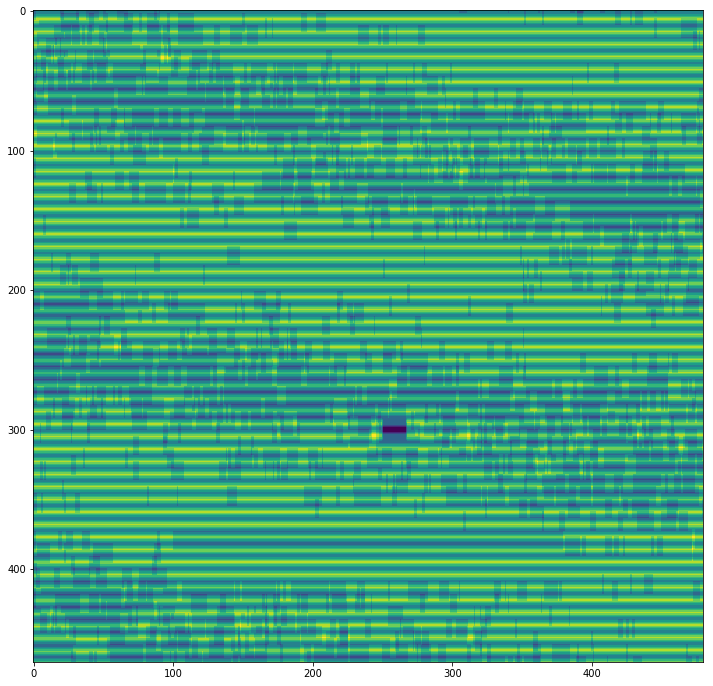

In [122]:
f = signal.convolve2d(thresh1, line2, 'valid')

plt.figure(figsize=(12,12))
plt.imshow(f)

In [123]:
#print(f[:,230])
print( int(np.min(f)), int(np.max(f)))

2 11


In [107]:
#print(f[:,228])
from numpy import argmax, argmin, unravel_index

unravel_index(f.argmin(), f.shape)

(299, 250)

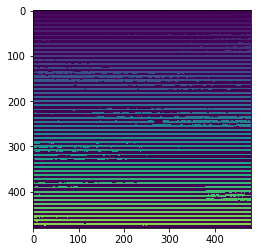

In [21]:
labels = measure.label(thresh3, background=0)
plt.imshow(labels)

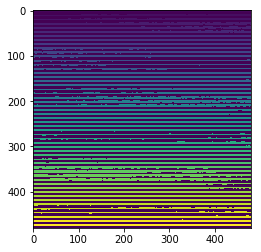

In [253]:
plt.imshow(thresh_img)

(<matplotlib.axes._subplots.AxesSubplot at 0x1b87ebe0>,
 <matplotlib.contour.QuadContourSet at 0x1d14b898>)

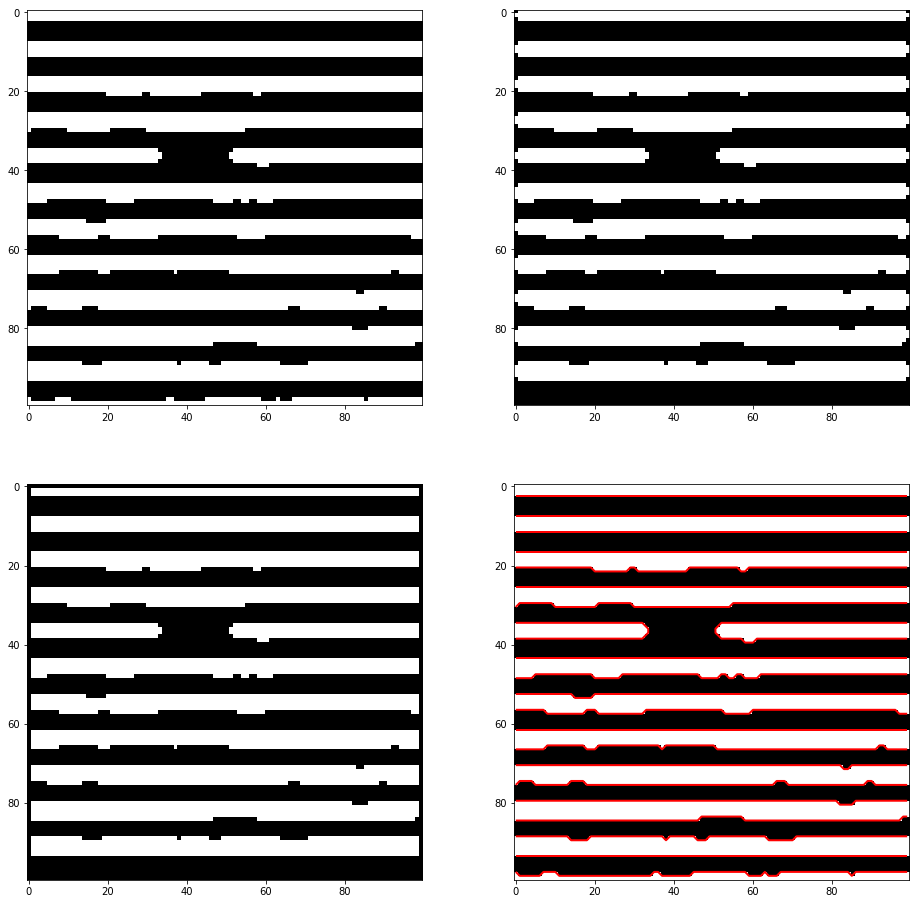

In [279]:
mask = thresh3[250:350, 150:250]

# Remove small white regions
open_img = ndimage.binary_opening(mask)
# Remove small black hole
close_img = ndimage.binary_closing(open_img)

plt.subplots(2,2, figsize=(16,16))
plt.subplot(221), plt.imshow(mask, cmap='gray')
plt.subplot(222), plt.imshow(open_img, cmap='gray')
plt.subplot(223), plt.imshow(close_img, cmap='gray')
plt.subplot(224), plt.imshow(mask, cmap='gray'), plt.contour(mask, [0.5], linewidths=2, colors='r')